# Create Data - Create Factors From Shiller Dataset
### *Shiller Investment Dataset.csv*

## Outline  
1. Import Data  
2. Review and Process Data
3. Create Factors  
    - Value
    - Momentum for stock
    - Momentum for bond
    - Growth
    - Yield
4. Create Shiller Dataframe of Returns and Factors
5. Save Shiller Dataframe


### Dependencies
- #### Data:  
    - Shiller Investment Dataset.csv


# 1. Import Data  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # For graphs

#### Import Shiller Investment Dataset
This dataset was created from Shiller data:  
- http://www.econ.yale.edu/~shiller/data/ie_data.xls
- stock and bond returns were derived from the data  

In [2]:
df = pd.read_csv (r'Shiller Investment Dataset.csv')

In [3]:
df.head()

,Date,Price_nom,Div_nom,Earn_nom,Yield_10yr,CPI,Stk_ret,Bnd_ret,Div_yield
0,1919-12-31,8.92,0.5300,0.9300,4.930833,18.9,-0.024574,0.000972,0.057671
1,1920-01-31,8.83,0.5283,0.9192,4.970000,19.3,-0.005154,0.001009,0.059226
2,1920-02-29,8.10,0.5267,0.9083,4.980000,19.5,-0.077702,0.003282,0.059649
3,1920-03-31,8.67,0.5250,0.8975,4.990000,19.7,0.075772,0.003290,0.064815
4,1920-04-30,8.60,0.5233,0.8867,5.000000,20.3,-0.003044,0.003299,0.060358


#### Set Date as index

In [4]:
df.set_index('Date', inplace=True)

# 2.   Review and Process Data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#### Check for NaN's

In [6]:
np.sum(df.isna())

Price_nom     0
Div_nom       0
Earn_nom      0
Yield_10yr    0
CPI           0
Stk_ret       0
Bnd_ret       0
Div_yield     0
dtype: int64

In [7]:
df.dropna(inplace=True)   # remove NaN's

#### Check for outliers

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price_nom,1225.0,489.773891,808.010099,4.770000,16.890000,93.010000,661.230000,4674.772727
Div_nom,1225.0,10.061741,14.056567,0.440000,0.850000,3.110000,14.270000,60.397117
Earn_nom,1225.0,23.304008,34.628441,0.290000,1.290000,5.736670,27.330000,197.870000
Yield_10yr,1225.0,4.783199,2.728199,0.620000,2.661667,3.960000,6.270000,15.320000
CPI,1225.0,88.199781,81.585873,12.600000,19.000000,39.800000,156.700000,278.802000
Stk_ret,1225.0,0.009299,0.044050,-0.261879,-0.010116,0.012864,0.032581,0.513085
Bnd_ret,1225.0,0.004183,0.014879,-0.080542,-0.000829,0.003031,0.008938,0.105548
Div_yield,1225.0,0.038793,0.017425,0.011007,0.024289,0.036364,0.050794,0.132767


#### Comparing Cumulative Returns of Stocks and Bonds

In [9]:
df['Stk_cum_ret'] = np.cumprod(1 + df['Stk_ret']) 

df['Bnd_cum_ret'] = np.cumprod(1 + df['Bnd_ret']) 

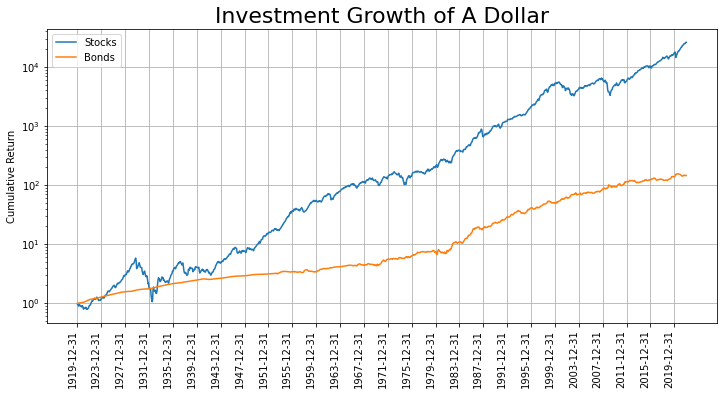

In [10]:
max_number = len(df.index)
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df.index, df.Stk_cum_ret, label='Stocks')
plt.plot(df.index, df.Bnd_cum_ret, label='Bonds')
plt.yscale("log")
plt.title('Investment Growth of A Dollar', fontsize=22)
plt.ylabel('Cumulative Return')
plt.legend()
ax.set_xticks(np.arange(0, max_number, 48))
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### Comparing Relative Cumulative Returns of Stocks and Bonds

In [11]:
rel_perf = df.Stk_cum_ret/df.Bnd_cum_ret

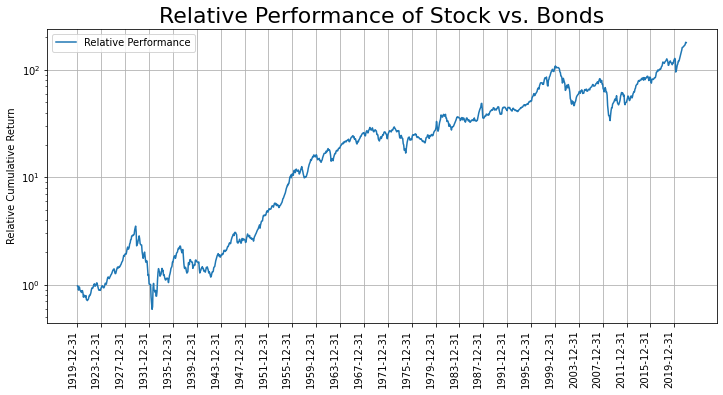

In [12]:
max_number = len(df.index)
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df.index, rel_perf, label='Relative Performance')
plt.yscale("log")
plt.title('Relative Performance of Stock vs. Bonds', fontsize=22)
plt.ylabel('Relative Cumulative Return')
plt.legend()
ax.set_xticks(np.arange(0, max_number, 48))
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.grid()
plt.show()

# 3. Create Factors
- Value
- Momentum for stock
- Momentum for bond
- Growth
- Yield

In [13]:
df['Value'] = df.Earn_nom/df.Price_nom                            # E/P (less volatile than P/E)
df['Momentum_stk'] = df.Stk_cum_ret/df.Stk_cum_ret.shift(12)-1    # 12 month
df['Momentum_bnd'] = df.Bnd_cum_ret/df.Bnd_cum_ret.shift(12)-1    # 12 month
df['Growth'] = (df.Earn_nom/df.Earn_nom.shift(60))**(12/60)-1     # 5yr earnings growth (P[t]*(1+r)^5 = P[t+60])
df['Yield'] = df.Yield_10yr/100                                   # YTM of 10yr T-bond

#### Plot Factors

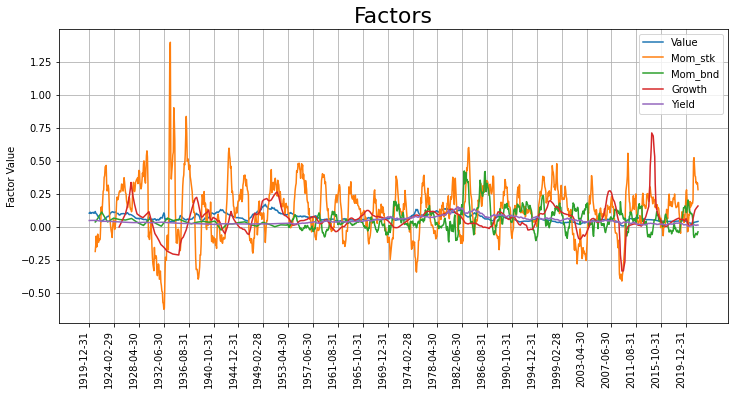

In [14]:
max_number = len(df.index)
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df.index, df.Value, label='Value')
plt.plot(df.index, df.Momentum_stk, label='Mom_stk')
plt.plot(df.index, df.Momentum_bnd, label='Mom_bnd')
plt.plot(df.index, df.Growth, label='Growth')
plt.plot(df.index, df.Yield, label='Yield')
plt.title('Factors', fontsize=22)
plt.ylabel('Factor Value')
plt.legend()
ax.set_xticks(np.arange(0, max_number, 50))
fig.autofmt_xdate()
plt.xticks(rotation=90)
plt.grid()
plt.show()

# 4. Create Shiller Dataframe of Returns and Factors

In [15]:
df_shiller = df[['Stk_ret', 'Bnd_ret','Value', 'Momentum_stk', 'Momentum_bnd', 'Growth', 'Yield']].copy()

#### Check for NaN's

In [16]:
np.sum(df_shiller.isna())

Stk_ret          0
Bnd_ret          0
Value            0
Momentum_stk    12
Momentum_bnd    12
Growth          60
Yield            0
dtype: int64

In [17]:
df_shiller.dropna(inplace=True)     # Remove NaN's

In [18]:
df_shiller.head()

,Stk_ret,Bnd_ret,Value,Momentum_stk,Momentum_bnd,Growth,Yield
Date,,,,,,,
1924-12-31,0.058696,0.004539,0.091535,0.261498,0.057413,0.000000,0.038767
1925-01-31,0.045884,0.004527,0.090425,0.271165,0.056547,0.008029,0.038600
1925-02-28,0.012904,0.004379,0.092156,0.275372,0.056249,0.015994,0.038450
1925-03-31,-0.021849,0.004368,0.097209,0.265398,0.055953,0.023900,0.038300
1925-04-30,-0.006042,0.004357,0.100875,0.280609,0.055658,0.031812,0.038150


In [19]:
df_shiller.describe().T

,count,mean,std,min,25%,50%,75%,max
Stk_ret,1165.0,0.009432,0.044423,-0.261879,-0.009918,0.012961,0.032561,0.513085
Bnd_ret,1165.0,0.004142,0.015248,-0.080542,-0.001424,0.002906,0.009154,0.105548
Value,1165.0,0.069624,0.028530,0.008082,0.051409,0.060862,0.086094,0.171797
Momentum_stk,1165.0,0.126156,0.204124,-0.622834,0.007803,0.136464,0.252546,1.398059
Momentum_bnd,1165.0,0.051994,0.072471,-0.113205,0.014542,0.037885,0.077057,0.424480
Growth,1165.0,0.059567,0.102995,-0.333095,0.016012,0.059964,0.099845,0.711868
Yield,1165.0,0.047992,0.027953,0.006200,0.026342,0.038600,0.064800,0.153200


#### Annualized Numbers

In [20]:
print(f'Stock mean return = {df_shiller.Stk_ret.mean()*12:.2%}')
print(f'Bond mean return = {df_shiller.Bnd_ret.mean()*12:.2%}')
print(f'Stock std dev = {np.std(df_shiller.Stk_ret)*12**.5:.2%}')
print(f'Bond std dev = {np.std(df_shiller.Bnd_ret)*12**.5:.2%}')

Stock mean return = 11.32%
Bond mean return = 4.97%
Stock std dev = 15.38%
Bond std dev = 5.28%


#### Review distributions

Pairplots


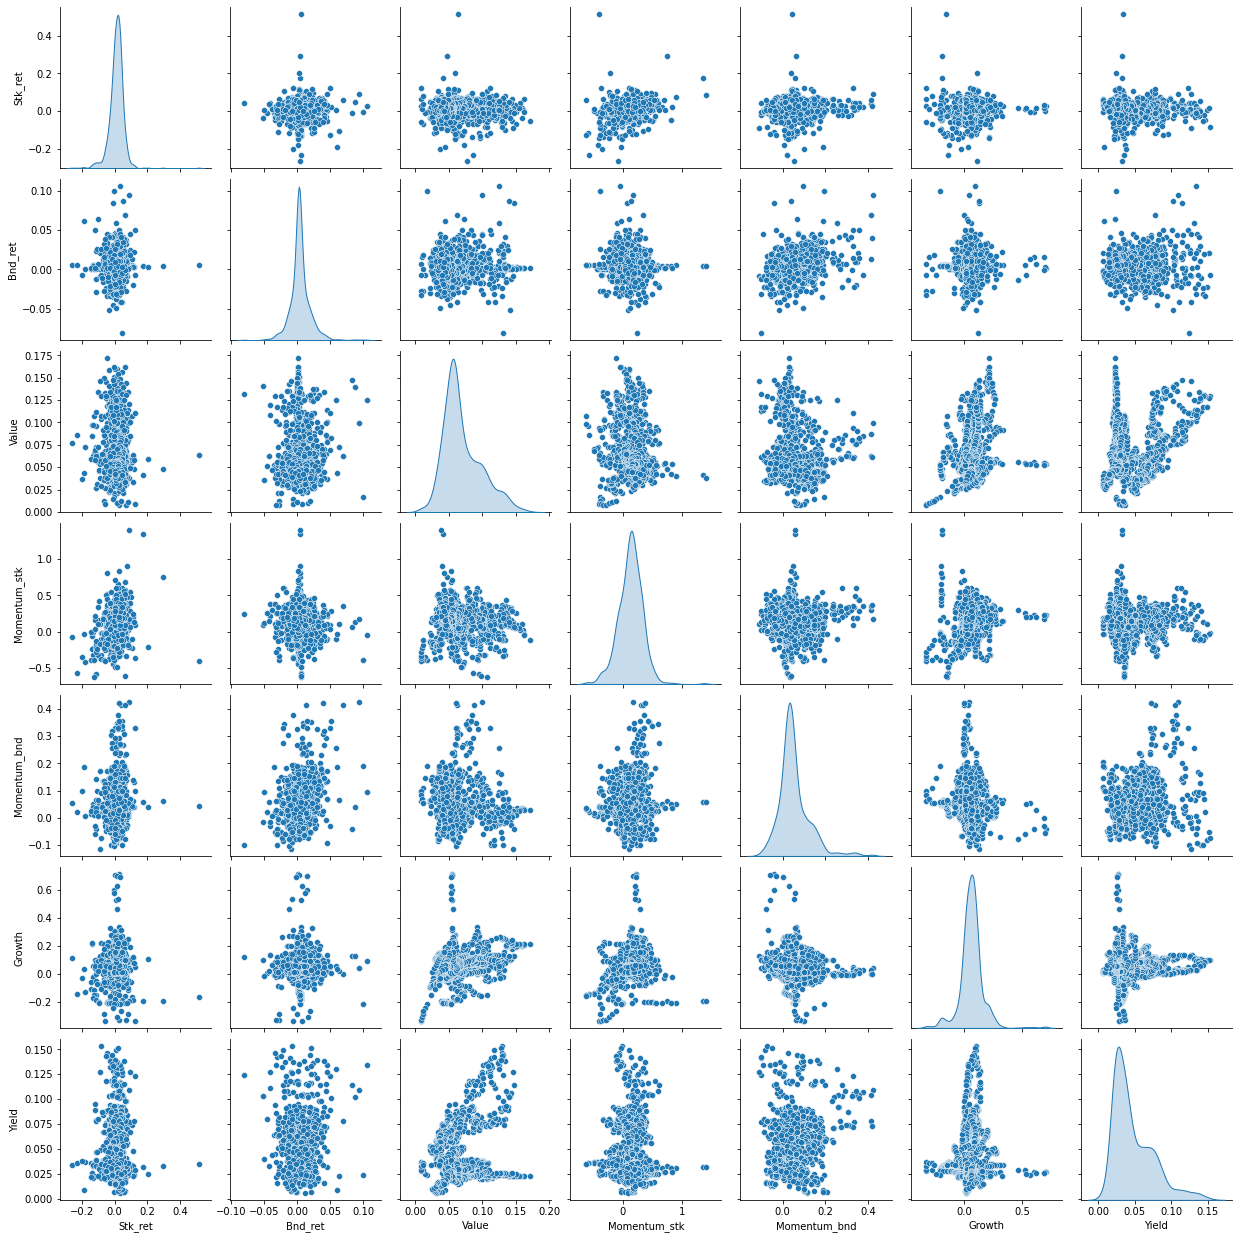

In [21]:
print('Pairplots')
sns.pairplot(df_shiller, diag_kind='kde')
plt.show()

## Save Shiller Dataframe

In [22]:
df_shiller.to_pickle("df_shiller")

In [23]:
df_test = pd.read_pickle("df_shiller")

##### Check if the same

In [24]:
df_shiller.equals(df_test)

True

In [25]:
pd.__version__

'1.0.4'

Does not support ".compare"